# Business Objective

Rampant fraud in US healthcare system results in increased premiums for many vulnerable citizens who cannot afford to pay hefty price for a fundamental right such as healthcare. The aim is to find patterns of fraud commited by providers and train ML models to detect similar patterns in the future. Dataset for this capstone project is obtained from Kaggle [here](https://www.kaggle.com/code/rohitrox/medical-provider-fraud-detection/data).

---


Abuse in healthcare system can take many forms, such as:

*Billing for services that were not rendered.

*Duplicate submission of a claim for the same service.

*Charging for a more complex or expensive than was actually provided.

# Declarations

#--- Optional:  For Google Colab 
#---   change this cell to Code to enable

""" from google.colab import drive
drive.mount('/content/drive')

#--- google drive refs
m_kstrRoot = '/content/drive/My Drive/Colab Notebooks/fourthbrain.ai/'
m_kstrRoot = m_kstrRoot + 'capstone/'
m_kstrData = m_kstrRoot + 'data/' """

In [3]:
#--- imports;  versions reqs listed are from local fastapi dev env:  prod_capstone  
import pandas as pd               #--- pandas==1.5.3
import numpy as np                #--- numpy==1.24.1
import sklearn                    #--- sklearn=0.0.post1;  scikit-learn >=1.1.1            
import pickle                     #--- pickle >= 4.0

pd.__version__,  np.__version__
sklearn.__version__, pickle.format_version



#--- declarations; initializations
global m_test_df
global m_test_beneficiary_df
global m_test_inpatient_df 
global m_test_outpatient_df



#--- adjust as required for local path refs
from pathlib import Path

#pth_pwd = Path(__file__).resolve().parent
pth_pwd = Path('/home/kidcoconut/myLurnins/fourthbrain.ai/code/rpo_mle10_capstone/demo/notebooks')
pth_appRoot = str(pth_pwd.parent) + "/app"

pth_root = str(pth_appRoot) + "/"
pth_api = pth_root + "api/"
pth_bin = pth_root + "bin/"
pth_binModels = pth_root + "bin/models/"
pth_data = pth_root + "data/"
pth_lib = pth_root + "lib/"
pth_libModels = pth_root + "models/"
pth_model = pth_root + "model/"
pth_model_baseline = str(pth_pwd.parent.parent) + "/model-baseline/"
pth_qa = pth_root + "qa/"
pth_routes = pth_root + "routes/"
pth_templ = pth_root + "templ/"
pth_uix = pth_root + "uix/"

#--- overrides
#pth_binModels = pth_model_baseline

print("INFO (pth_appRoot):  ", pth_appRoot)

INFO (pth_appRoot):   /home/kidcoconut/myLurnins/fourthbrain.ai/code/rpo_mle10_capstone/demo/app


## pre-reqs

In [4]:
#--- imports;  versions reqs listed are from local fastapi dev env:  prod_capstone  
import pandas as pd               #--- pandas==1.5.2
import numpy as np                #--- numpy==1.23.5             
import sklearn                    #--- scikit-learn ==1.1.0            
import pickle                     #--- pickle >= 4.0
            
#--- imports;  versions reqs listed are from local fastapi dev env:  prod_capstone  
import pandas as pd               #--- pandas==1.5.2
import numpy as np                #--- numpy==1.23.5             
import sklearn                    #--- scikit-learn >=1.2.0            
import pickle                     #--- pickle >= 4.0

m_kstr_pyV = "py3816_"
m_kstr_scikitLearnV = "sk111hp_"  #--- hp==HIGHEST PKL PROTOCOL
#pth_binModels = m_kstrData

def persistScaler(scalarObj):
  #--- persist the std scaler
  with open(pth_binModels + "prov_stdScl_"+ m_kstr_pyV + m_kstr_scikitLearnV +"32cols.pkl", 'wb') as filPkl:
      pickle.dump(scalarObj, filPkl, protocol=pickle.HIGHEST_PROTOCOL)

def persistLogRegr_model(modelObj):
  with open(pth_binModels + "prov_lgr_"+ m_kstr_pyV + m_kstr_scikitLearnV +"32cols.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl, protocol=pickle.HIGHEST_PROTOCOL)

def persistSVM_model(modelObj):
  with open(pth_binModels + "prov_svm_"+ m_kstr_pyV + m_kstr_scikitLearnV +"32cols.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl,protocol=pickle.HIGHEST_PROTOCOL)

def persistGBC_model(modelObj):
  with open(pth_binModels + "prov_gbc_"+ m_kstr_pyV +  m_kstr_scikitLearnV +"32cols.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl,protocol=pickle.HIGHEST_PROTOCOL)


def persistEnc_model(modelObj):
  with open(pth_binModels + "prov_enc_"+ m_kstr_pyV +  m_kstr_scikitLearnV +"32cols.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl,protocol=pickle.HIGHEST_PROTOCOL)


def persistKMeans_model(modelObj):
  with open(pth_binModels + "claims_kmn_"+ m_kstr_pyV +  m_kstr_scikitLearnV +"22cols.pkl", 'wb') as filPkl:
      pickle.dump(modelObj, filPkl,protocol=pickle.HIGHEST_PROTOCOL)



def prereq_getCurrVersions():
  print("INFO:  get current dep versions ...")
  print("python.v: ")                               
  !python -V

  print("pd.v: ", pd.__version__)                   #--- pandas 1.5.2
  print("np.v: ", np.__version__)                   #--- numpy 1.24.1
  print("sk.v: ", sklearn.__version__)              #--- sklearn >=0.0.post1
  #print("skl.v: ", scikit-learn.__version__)       
  print("pkl.v: ", pickle.format_version)           #--- pickle >= 4.0

  prereqs_checkSklearn()


def prereq_upgradePython():
  print("INFO:  upgrading python ...")
  !wget https://github.com/korakot/kora/releases/download/v0.10/py310.sh
  !bash ./py310.sh -b -f -p /usr/local
  !python -m ipykernel install --name "py310" --user


def prereq_upgradeDeps():
  #--- optional exec:  ensure minimum libraries and versions
  print("INFO:  upgrading dependencies ...")
  !pip3 install -U pandas>=1.5.3
  !pip3 install -U numpy>=1.24.1
  !pip install -U scikit-learn==1.1.1


def prereq_forceDeps():
  import pkg_resources
  pkg_resources.require("pandas==1.5.3")
  pkg_resources.require("numpy==1.24.1")
  pkg_resources.require("scikit-learn==1.1.1")

  import pandas
  import numpy
  import sklearn  


def prereqs_checkSklearn():
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  print("INFO (nbk_capstone_unsuperv_clustering)  StdScaler.version: ", scaler.__getstate__()['_sklearn_version'])
  print("INFO (libModel.fitClaims_stdScalar)  sklearn.version: " , sklearn.__version__)


In [5]:

#--- INSPECT:  report on current versions
prereq_getCurrVersions()

INFO:  get current dep versions ...
python.v: 
Python 3.8.16
pd.v:  1.4.3
np.v:  1.23.1
sk.v:  1.1.1
pkl.v:  4.0
INFO (nbk_capstone_unsuperv_clustering)  StdScaler.version:  1.1.1
INFO (libModel.fitClaims_stdScalar)  sklearn.version:  1.1.1


# Data Engineering

## Load Train and Test Files

In [6]:
import pandas as pd
import os
pathname = '/content/drive/MyDrive/fourthbrain'


#--- localization override
#pathname = m_kstrData
pathname = pth_data


train_df = pd.read_csv(os.path.join(pathname,'Train-1542865627584.csv'))
train_beneficiary_df = pd.read_csv(os.path.join(pathname,'Train_Beneficiarydata-1542865627584.csv'))
train_inpatient_df = pd.read_csv(os.path.join(pathname,'Train_Inpatientdata-1542865627584.csv'))
train_outpatient_df = pd.read_csv(os.path.join(pathname,'Train_Outpatientdata-1542865627584.csv'))

test_df = pd.read_csv(os.path.join(pathname,'Test-1542969243754.csv'))
test_beneficiary_df = pd.read_csv(os.path.join(pathname,'Test_Beneficiarydata-1542969243754.csv'))
test_inpatient_df = pd.read_csv(os.path.join(pathname,'Test_Inpatientdata-1542969243754.csv'))
test_outpatient_df = pd.read_csv(os.path.join(pathname,'Test_Outpatientdata-1542969243754.csv'))

## Data Eng:  Beneficiary Dataset

In [7]:
train_beneficiary_df['ChronicCond_Alzheimer'].value_counts()

2    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64

In [8]:
train_beneficiary_df['ChronicCond_Heartfailure'].value_counts()

2    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64

In [9]:
train_beneficiary_df['ChronicCond_Cancer'].value_counts()

2    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64

In [10]:
test_beneficiary_df['ChronicCond_Cancer'].value_counts()

2    55176
1     8792
Name: ChronicCond_Cancer, dtype: int64

In [11]:
cols = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke'] 

for col in cols:
  train_beneficiary_df.replace({col: 2}, 0, inplace=True)
  test_beneficiary_df.replace({col: 2}, 0, inplace=True)

In [12]:
train_beneficiary_df['ChronicCond_Alzheimer'].value_counts()

0    92530
1    46026
Name: ChronicCond_Alzheimer, dtype: int64

In [13]:
train_beneficiary_df['ChronicCond_Heartfailure'].value_counts()

0    70154
1    68402
Name: ChronicCond_Heartfailure, dtype: int64

In [14]:
train_beneficiary_df['ChronicCond_Cancer'].value_counts()

0    121935
1     16621
Name: ChronicCond_Cancer, dtype: int64

In [15]:
test_beneficiary_df['ChronicCond_Cancer'].value_counts()

0    55176
1     8792
Name: ChronicCond_Cancer, dtype: int64



### Data Eng:  Beneficiary - Person's Age



**Train dataset:  Person's Age**

In [16]:


#--- train data:  update date of birth,  and Age  
train_beneficiary_df['DOB'] = pd.to_datetime(train_beneficiary_df['DOB'], format = '%Y-%m-%d')
train_beneficiary_df['DOD'] = pd.to_datetime(train_beneficiary_df['DOD'], format = '%Y-%m-%d') 
train_beneficiary_df['Age'] = round((train_beneficiary_df['DOD'] - train_beneficiary_df['DOB']).dt.days/365) 

#--- age data:  check how many Age-NaNs, and shape
#--- age data:  determine the age of (assumed) patients still alive
train_beneficiary_df['Age'].isna().sum(),  train_beneficiary_df.shape[0],  train_beneficiary_df['DOD'].max()

(137135, 138556, Timestamp('2009-12-01 00:00:00'))

In [17]:


#---    Take-away messages: 
#       - There are 1421 beneficiaries still alive
#       - Beneficiary data was last recorded on 2009-12-01
#       - We can calculate age of people that are still alive based on this date. 
train_beneficiary_df['Age'].fillna(round(((pd.to_datetime('2019-12-01', format='%Y-%m-%d') - train_beneficiary_df['DOB']).dt.days)/365), inplace=True)


#--- dbl check how many Age-NaNs;  ;  assert==0
train_beneficiary_df.Age.isna().sum()

0



**Test dataset:  Person's Age**

In [18]:


#--- test data:  update date of birth,  and Age  
test_beneficiary_df['DOB'] = pd.to_datetime(test_beneficiary_df['DOB'], format = '%Y-%m-%d')
test_beneficiary_df['DOD'] = pd.to_datetime(test_beneficiary_df['DOD'], format = '%Y-%m-%d') 
test_beneficiary_df['Age'] = round((test_beneficiary_df['DOD'] - test_beneficiary_df['DOB']).dt.days/365)

#--- age data:  check how many Age-NaNs, and shape
#--- age data:  determine the age of (assumed) patients still alive
test_beneficiary_df['Age'].isna().sum(),  test_beneficiary_df.shape[0],  test_beneficiary_df['DOD'].max()

(63394, 63968, Timestamp('2009-12-01 00:00:00'))

In [19]:


#---    Take-away messages: 
#       - There are 574 beneficiaries still alive 
#       - Beneficiary data was last recorded on 2009-12-01
#       - We can calculate age of people that are still alive based on this date. 
test_beneficiary_df['Age'].fillna(round(((pd.to_datetime('2019-12-01', format='%Y-%m-%d') - test_beneficiary_df['DOB']).dt.days)/365), inplace=True)


#--- dbl check how many Age-NaNs;  assert==0
test_beneficiary_df.Age.isna().sum()

0



#### New Feature (Train):  Dead Flag (Dead Or Not)

In [20]:

print("trainBenef_shape", "\t", "trainBenef_DoD_NaN\t", "\t", "trainBenef_DoD_!NaN")
print(train_beneficiary_df.shape, "\t",  train_beneficiary_df['DOD'].isna().sum(), "\t",  train_beneficiary_df['DOD'].notna().sum())

trainBenef_shape 	 trainBenef_DoD_NaN	 	 trainBenef_DoD_!NaN
(138556, 26) 	 137135 	 1421


In [21]:

#--- train:  create a flag to identify whether a beneficiary is alive or dead
train_beneficiary_df.loc[train_beneficiary_df['DOD'].isna(), 'DeadOrNot'] = 0 
train_beneficiary_df.loc[train_beneficiary_df['DOD'].notna(), 'DeadOrNot'] = 1 

train_beneficiary_df['DeadOrNot'].value_counts()

0.0    137135
1.0      1421
Name: DeadOrNot, dtype: int64



#### New Feature (Test):  Dead Flag (Dead Or Not)

In [22]:

print("testBenef_shape", "\t", "testBenef_DoD_NaN\t", "\t", "testBenef_DoD_!NaN")
print(test_beneficiary_df.shape, "\t",  test_beneficiary_df['DOD'].isna().sum(), "\t",  test_beneficiary_df['DOD'].notna().sum())

testBenef_shape 	 testBenef_DoD_NaN	 	 testBenef_DoD_!NaN
(63968, 26) 	 63394 	 574


In [23]:

#--- test:  create a flag to identify whether a beneficiary is alive or dead
test_beneficiary_df.loc[test_beneficiary_df['DOD'].isna(), 'DeadOrNot'] = 0 
test_beneficiary_df.loc[test_beneficiary_df['DOD'].notna(), 'DeadOrNot'] = 1 

test_beneficiary_df['DeadOrNot'].value_counts()

0.0    63394
1.0      574
Name: DeadOrNot, dtype: int64

## Data Eng:  In-patients

### New Feature:  Admitted Days

Creating a new feature 'AdmittedDays' based on AdmissionDt and DischargeDt

In [24]:
train_inpatient_df['AdmissionDt'] = pd.to_datetime(train_inpatient_df['AdmissionDt'], format='%Y-%m-%d')
train_inpatient_df['DischargeDt'] = pd.to_datetime(train_inpatient_df['DischargeDt'], format='%Y-%m-%d')
train_inpatient_df['AdmittedDays'] = round((train_inpatient_df['DischargeDt'] - train_inpatient_df['AdmissionDt']).dt.days + 1) 
                                           
test_inpatient_df['AdmissionDt'] = pd.to_datetime(test_inpatient_df['AdmissionDt'], format='%Y-%m-%d')
test_inpatient_df['DischargeDt'] = pd.to_datetime(test_inpatient_df['DischargeDt'], format='%Y-%m-%d')
test_inpatient_df['AdmittedDays'] = round((test_inpatient_df['DischargeDt'] - test_inpatient_df['AdmissionDt']).dt.days + 1)

In [25]:
train_inpatient_df['AdmittedDays'].isna().sum(),  test_inpatient_df['AdmittedDays'].isna().sum()

(0, 0)

In [26]:
train_inpatient_df.shape,  train_inpatient_df.columns

((40474, 31),
 Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
        'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
        'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
        'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
        'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
        'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
        'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
        'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
        'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
        'ClmProcedureCode_6', 'AdmittedDays'],
       dtype='object'))

## Data Eng:  Merge Inpatients and Outpatients - All-Patients

In [27]:
key_columns_to_merge_train = list(train_outpatient_df.columns)
key_columns_to_merge_test = list(test_outpatient_df.columns)


print(key_columns_to_merge_train)
print(key_columns_to_merge_test)

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode']
['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProced

In [28]:

#--- Merge Train:  Inpatient and Outpatient
train_merged_patient_data = train_inpatient_df.merge(train_outpatient_df, on=key_columns_to_merge_train, how='outer')


#--- Merge Test:  Inpatient and Outpatient
test_merged_patient_data = test_inpatient_df.merge(test_outpatient_df, on=key_columns_to_merge_test, how='outer')


#--- INSPECT
train_merged_patient_data.shape,  test_merged_patient_data.shape

((558211, 31), (135392, 31))

## Data Eng:  Merge Beneficiary and All-Patient data

In [29]:

#--- Merge Train:  All Patient = Inpatient + Outpatient + Beneficiaries
trainAllPatientDetailsData = train_merged_patient_data.merge(train_beneficiary_df, on='BeneID', how='inner')


#--- Merge Test:  All Patient = Inpatient + Outpatient + Beneficiaries
testAllPatientDetailsData = test_merged_patient_data.merge(test_beneficiary_df, on='BeneID', how='inner')

#--- INSPECT
trainAllPatientDetailsData.shape, testAllPatientDetailsData.shape

((558211, 57), (135392, 57))

## Data Eng:  Merge All-patients with Providers

In [30]:

#--- Merge Train:  All Patients + Providers
trainAllPatientDetailsProvider = trainAllPatientDetailsData.merge(train_df, on='Provider', how='inner')

#--- Merge Test:  All Patients + Providers
testAllPatientDetailsProvider = testAllPatientDetailsData.merge(test_df, on='Provider', how='inner')

#--- INSPECT
trainAllPatientDetailsProvider.shape, testAllPatientDetailsProvider.shape 

((558211, 58), (135392, 57))

**AXIOM:**     by merging provider labels with claims data,  we are impressing our confidence on all child claims tied to a given Provider as being at equal risk of fraud. 
               In reality,  there may be child claims for any provider that can be associated to fraud or non-fraud

In [31]:

#--- SANITY:  Train vs Test cols
#--- check which cols in train do not exist in test 
test_columns = list(testAllPatientDetailsProvider.columns)
train_columns = trainAllPatientDetailsProvider.columns
[colTrain for colTrain in train_columns if colTrain not in test_columns]

['PotentialFraud']

In [32]:

#--- INSPECT
test_df.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


# Feature Engineering

In [33]:
pd.set_option('display.max_columns', None)
trainAllPatientDetailsProvider.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,AdmittedDays,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1943-01-01,NaT,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,77.0,0.0,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaT,NaN,0.0,NaT,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,88.0,0.0,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,13.0,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,106.0,0.0,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,19.0,1922-10-01,NaT,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,97.0,0.0,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,5.0,1930-07-01,NaT,2,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,89.0,0.0,Yes


## Feat Eng:  Drop categorical cols

In [34]:

#--- Note:  we will be labelling by Provider;  retain this categorical col
columns_to_remove = ['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt',
                     'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 
                     'AdmissionDt', 'ClmAdmitDiagnosisCode', 
                     'DischargeDt', 'DiagnosisGroupCode',
                     'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 
                     'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                     'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
                     'DOB', 'DOD',
                     'State', 'County']


#--- Future Considerations:
#   - check correlations between ClmDiagnosis and ClmProcedure codes;  hypothesis:  high corellation=normal;  deviations may indicate key-stroke errors or anoms/fraud
#   - check correlations between Operating Physicians against ClmProcedure codes;  likewise against ClmDiagnosis codes;  deviations may indicate errors or anoms/fraud 
#   - any analysis on State, County, Race may be difficult to defend/justify due to potential bias/prejudice

In [35]:

#--- Drop cols:  train and test 
train_final = trainAllPatientDetailsProvider.drop(columns=columns_to_remove, axis=1)
test_final = testAllPatientDetailsProvider.drop(columns=columns_to_remove, axis=1)


#--- INSPECT
train_final.shape,  test_final.shape

((558211, 27), (135392, 26))

## Feat Eng:  Analyze Missing Data

In [36]:
train_final.isnull().sum()

Provider                                0
InscClaimAmtReimbursed                  0
DeductibleAmtPaid                     899
AdmittedDays                       517737
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt                0
OPAnnualDeductibleAmt             

In [37]:
test_final.isnull().sum()

Provider                                0
InscClaimAmtReimbursed                  0
DeductibleAmtPaid                     196
AdmittedDays                       125841
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt                0
OPAnnualDeductibleAmt             

## Feat Eng:  Set categorical cols

In [38]:
train_final.Gender = train_final.Gender.astype('category')
train_final.Race = train_final.Race.astype('category')


test_final.Gender = test_final.Gender.astype('category')
test_final.Race = test_final.Race.astype('category')

## Feat Eng:  One-hot encoding

In [39]:

#--- one-hot encode;  drop first category;  consider ... ignore any unknown categories upon transform (sklearn.OneHotEncoder handle_unknown='ignore')
train_final = pd.get_dummies(train_final, columns=['Gender', 'Race'], drop_first=True)
test_final = pd.get_dummies(test_final, columns=['Gender', 'Race'], drop_first=True)

train_final.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,PotentialFraud,Gender_2,Race_2,Race_3,Race_5
0,PRV55912,26000,1068.0,7.0,0,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,77.0,0.0,Yes,0,0,0,0
1,PRV55912,50,0.0,NaN,0,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,88.0,0.0,Yes,0,0,0,0
2,PRV55912,19000,1068.0,13.0,0,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,106.0,0.0,Yes,1,0,0,0
3,PRV55912,17000,1068.0,19.0,0,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,97.0,0.0,Yes,0,0,0,0
4,PRV55912,13000,1068.0,5.0,0,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,89.0,0.0,Yes,1,0,0,0


In [40]:

test_final.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5
0,PRV57070,9000,1068.0,8.0,Y,12,12,0,1,1,0,1,1,0,1,0,0,0,21260,2136,120,100,82.0,0.0,1,0,0,0
1,PRV57070,3000,1068.0,3.0,0,12,12,1,1,1,0,1,1,1,1,0,1,0,8000,2136,2540,1880,83.0,0.0,1,0,0,0
2,PRV57070,7000,1068.0,7.0,Y,12,12,0,1,1,0,1,0,0,1,1,0,0,10200,2136,40,100,82.0,0.0,1,0,0,0
3,PRV57070,5000,1068.0,9.0,0,12,12,0,0,1,0,1,0,0,1,1,0,0,5000,1068,600,180,95.0,0.0,1,0,0,0
4,PRV57070,9000,1068.0,11.0,Y,12,12,1,1,1,1,1,0,1,1,0,1,0,9000,1068,10,40,76.0,0.0,1,0,0,0


In [41]:
train_final['PotentialFraud'].value_counts()

No     345415
Yes    212796
Name: PotentialFraud, dtype: int64

In [42]:
train_final.loc[train_final['PotentialFraud'] == 'Yes', 'PotentialFraud'] = 1
train_final.loc[train_final['PotentialFraud'] == 'No', 'PotentialFraud'] = 0

In [43]:
train_final['RenalDiseaseIndicator'].value_counts()

0    448363
Y    109848
Name: RenalDiseaseIndicator, dtype: int64

In [44]:
train_final.loc[train_final['RenalDiseaseIndicator'] == 'Y', 'RenalDiseaseIndicator'] = 1 
test_final.loc[test_final['RenalDiseaseIndicator'] == 'Y', 'RenalDiseaseIndicator'] = 1 

In [45]:
train_final['DeductibleAmtPaid'].fillna(0, inplace=True)
train_final['AdmittedDays'].fillna(0, inplace=True)

test_final['DeductibleAmtPaid'].fillna(0, inplace=True)
test_final['AdmittedDays'].fillna(0, inplace=True)

In [46]:
train_final.isna().sum()

Provider                           0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
AdmittedDays                       0
RenalDiseaseIndicator              0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Age                                0
DeadOrNot                          0
PotentialFraud                     0
Gender_2                           0
Race_2                             0
R

In [47]:
test_final.isna().sum()

Provider                           0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
AdmittedDays                       0
RenalDiseaseIndicator              0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
Age                                0
DeadOrNot                          0
Gender_2                           0
Race_2                             0
Race_3                             0
R

## Feat Eng:  Check for correlated columns

In [48]:

#--- INSPECT:  shape
train_final.shape,  test_final.shape

((558211, 29), (135392, 28))

In [49]:
#--- INSPECT:  column types
train_final.dtypes

Provider                            object
InscClaimAmtReimbursed               int64
DeductibleAmtPaid                  float64
AdmittedDays                       float64
RenalDiseaseIndicator               object
NoOfMonths_PartACov                  int64
NoOfMonths_PartBCov                  int64
ChronicCond_Alzheimer                int64
ChronicCond_Heartfailure             int64
ChronicCond_KidneyDisease            int64
ChronicCond_Cancer                   int64
ChronicCond_ObstrPulmonary           int64
ChronicCond_Depression               int64
ChronicCond_Diabetes                 int64
ChronicCond_IschemicHeart            int64
ChronicCond_Osteoporasis             int64
ChronicCond_rheumatoidarthritis      int64
ChronicCond_stroke                   int64
IPAnnualReimbursementAmt             int64
IPAnnualDeductibleAmt                int64
OPAnnualReimbursementAmt             int64
OPAnnualDeductibleAmt                int64
Age                                float64
DeadOrNot  

In [50]:

#--- INSPECT:  Correlated cols on Train data
klngCorrThresh = 0.8                                  #--- correlation threshold
cor = train_final.corr()                              #--- default:  numeric cols only

keep_columns = np.full(cor.shape[0], True) 

for i in range(cor.shape[0]-1):
  for j in range(i+1, cor.shape[0]-1):
    if (np.abs(cor.iloc[i,j]) >= klngCorrThresh):     #--- check if the cols are highly correlated, and list for removal
      keep_columns[i] = False 

#selected_columns = train_final.columns[keep_columns]

keep_columns                                          #--- 26 cols

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True])

In [51]:
cor.columns                                             #--- 26 cols

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'AdmittedDays',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'DeadOrNot',
       'Gender_2', 'Race_2', 'Race_3', 'Race_5'],
      dtype='object')

<AxesSubplot:>

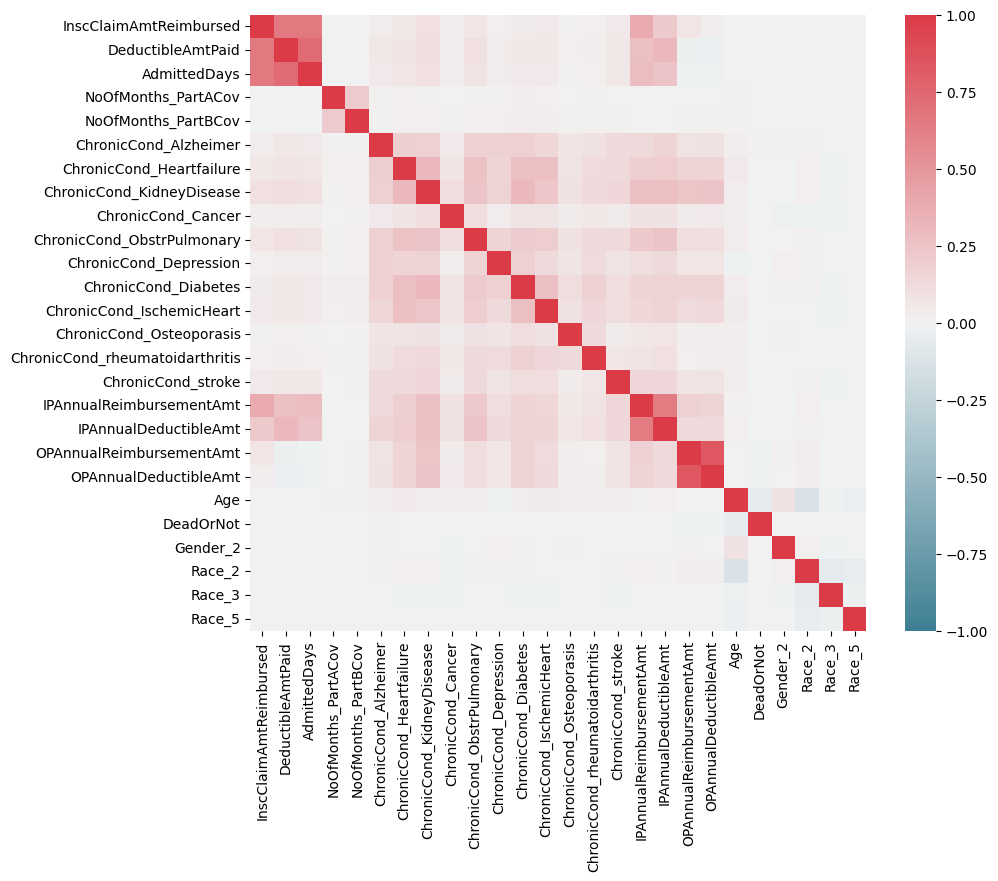

In [52]:
#--- INSPECT:  column correlations
import matplotlib.pyplot as pl
import seaborn as sns

f, ax = pl.subplots(figsize=(10, 8))
sns.heatmap(cor,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [53]:
train_final.shape,  cor.shape

((558211, 29), (26, 26))

In [54]:
test_final.columns              #--- 28 cols

Index(['Provider', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'AdmittedDays', 'RenalDiseaseIndicator', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'DeadOrNot',
       'Gender_2', 'Race_2', 'Race_3', 'Race_5'],
      dtype='object')

## Feat Eng:  Add New features (x6 Avgs)

In [55]:
train_final['InscClaimReimbursement_ProviderAvg'] = train_final.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('mean')
test_final['InscClaimReimbursement_ProviderAvg'] = test_final.groupby(['Provider'])['InscClaimAmtReimbursed'].transform('mean')

In [56]:
train_final['DeductibleAmtPaid_ProviderAvg'] = train_final.groupby(['Provider'])['DeductibleAmtPaid'].transform('mean')
test_final['DeductibleAmtPaid_ProviderAvg'] = test_final.groupby(['Provider'])['DeductibleAmtPaid'].transform('mean')

In [57]:
train_final['IPAnnualReimbursementAmt_ProviderAvg'] = train_final.groupby(['Provider'])['IPAnnualReimbursementAmt'].transform('mean')
test_final['IPAnnualReimbursementAmt_ProviderAvg'] = test_final.groupby(['Provider'])['IPAnnualReimbursementAmt'].transform('mean')

In [58]:
train_final['IPAnnualDeductibleAmt_ProviderAvg'] = train_final.groupby(['Provider'])['IPAnnualDeductibleAmt'].transform('mean')
test_final['IPAnnualDeductibleAmt_ProviderAvg'] = test_final.groupby(['Provider'])['IPAnnualDeductibleAmt'].transform('mean')

In [59]:
train_final['OPAnnualReimbursementAmt_ProviderAvg'] = train_final.groupby(['Provider'])['OPAnnualReimbursementAmt'].transform('mean')
test_final['OPAnnualReimbursementAmt_ProviderAvg'] = test_final.groupby(['Provider'])['OPAnnualReimbursementAmt'].transform('mean')

In [60]:
train_final['OPAnnualDeductibleAmt_ProviderAvg'] = train_final.groupby(['Provider'])['OPAnnualDeductibleAmt'].transform('mean')
test_final['OPAnnualDeductibleAmt_ProviderAvg'] = test_final.groupby(['Provider'])['OPAnnualDeductibleAmt'].transform('mean')

# Data Preparation

## Group Claims Data by Provider

In [61]:
train_final_groupby = train_final.groupby(['Provider', 'PotentialFraud'], as_index = False).agg('sum')
test_final_groupby = test_final.groupby(['Provider'], as_index=False).agg('sum')

train_final_groupby.shape,  test_final_groupby.shape

((5410, 34), (1353, 33))

In [62]:
test_final_groupby.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'AdmittedDays', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'DeadOrNot', 'Gender_2', 'Race_2',
       'Race_3', 'Race_5', 'InscClaimReimbursement_ProviderAvg',
       'DeductibleAmtPaid_ProviderAvg', 'IPAnnualReimbursementAmt_ProviderAvg',
       'IPAnnualDeductibleAmt_ProviderAvg',
       'OPAnnualReimbursementAmt_ProviderAvg',
       'OPAnnualDeductibleAmt_ProviderAvg'],
      dtype='object')

In [63]:
X = train_final_groupby.drop(columns=['Provider', 'PotentialFraud'], axis=1)
y = train_final_groupby['PotentialFraud']
y = y.astype('int')

In [64]:
train_final_groupby.shape,  test_final_groupby.shape

((5410, 34), (1353, 33))

In [65]:
train_final_groupby.loc[train_final_groupby['Provider'] == 'PRV51003'].head()

,Provider,PotentialFraud,InscClaimAmtReimbursed,DeductibleAmtPaid,AdmittedDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,DeadOrNot,Gender_2,Race_2,Race_3,Race_5,InscClaimReimbursement_ProviderAvg,DeductibleAmtPaid_ProviderAvg,IPAnnualReimbursementAmt_ProviderAvg,IPAnnualDeductibleAmt_ProviderAvg,OPAnnualReimbursementAmt_ProviderAvg,OPAnnualDeductibleAmt_ProviderAvg
1,PRV51003,1,605670,66286.0,382.0,1560,1567,56,80,64,10,41,54,100,112,33,38,12,999000,122948,353520,97300,10553.0,1.0,78.0,24.0,0.0,1.0,605670.0,66286.0,999000.0,122948.0,353520.0,97300.0


In [66]:
train_final_groupby.shape,  X.shape,  y.shape,  test_final_groupby.shape,  test_final_groupby.iloc[:, 1:].shape

((5410, 34), (5410, 32), (5410,), (1353, 33), (1353, 32))

## Apply Standard Scaler


In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sclObj = scaler.fit(X)                                      #--- train data;  32 cols grouped by provider;  dropped provider and label

#--- export pkl file for provider level scaling
persistScaler(sclObj)


#--- fit the std scaler on the train data;  transform the train and the test
X_minmax = sclObj.transform(X)                              #--- Note:  32 cols;  X is train_final_groupby but without Provider and PotentialFraud cols
X_scaled = X_minmax
X_test = scaler.transform(test_final_groupby.iloc[:, 1:])   #--- Note:  test_final_groupby is passed into the transform with all rows, and all cols (except the first:  Provider).  The Test dataset does not have a PotentialFraud col.

## Split Train and validation

In [68]:
from sklearn.model_selection import train_test_split

# Stratify = y will ensure equal number of potential fraud cases in train and validation dataset 
X_train, X_val, y_train, y_val = train_test_split(X_minmax, y, test_size=0.3, random_state=2022, stratify=y, shuffle=True)

In [69]:
print(f'X train dataset: {X_train.shape}')
print(f'y train dataset: {y_train.shape}')

X train dataset: (3787, 32)
y train dataset: (3787,)


In [70]:
print(f'X validation dataset: {X_val.shape}')
print(f'y validation dataset: {y_val.shape}')

X validation dataset: (1623, 32)
y validation dataset: (1623,)


In [71]:
X_val[0,:]

array([-0.31897753, -0.31732824, -0.31190787, -0.21248512, -0.21257621,
       -0.34340524, -0.19485988, -0.12278404, -0.25557352, -0.23252876,
       -0.18599364, -0.20315994, -0.21607582, -0.1953917 , -0.33266682,
       -0.38630658, -0.05298077, -0.25966756, -0.18723404, -0.18039556,
       -0.22352393, -0.32994963, -0.26495847, -0.35820504, -0.17022483,
       -0.19598378, -0.31897753, -0.31732824, -0.05298077, -0.25966756,
       -0.18723404, -0.18039556])

# Model Selection

## Model I: Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score as accuracy,
    recall_score as recall,
    precision_score as precision,
    f1_score
)

In [73]:
%%time
#lr = LogisticRegression(featuresCol=selected_columns, labelCol='Purchase', maxIter=10)
lr = LogisticRegressionCV(cv=10, class_weight='balanced', random_state=2022)
lr_model = lr.fit(X_train, y_train) 


type(lr_model)

#--- persist lgr_model
persistLogRegr_model(lr_model)                  #--- X_train is 32 cols;        F1-score=0.6

/home/kidcoconut/miniconda3/envs/nbk_capst_py38_sk111/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kidcoconut/miniconda3/envs/nbk_capst_py38_sk111/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

CPU times: user 31.3 s, sys: 26.9 s, total: 58.1 s
Wall time: 14.8 s


In [74]:


#--- Predict probabilities for X_train and X_val
lr_train_pred_probability = lr_model.predict_proba(X_train)
lr_val_pred_probability = lr_model.predict_proba(X_val)

/home/kidcoconut/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/kidcoconut/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


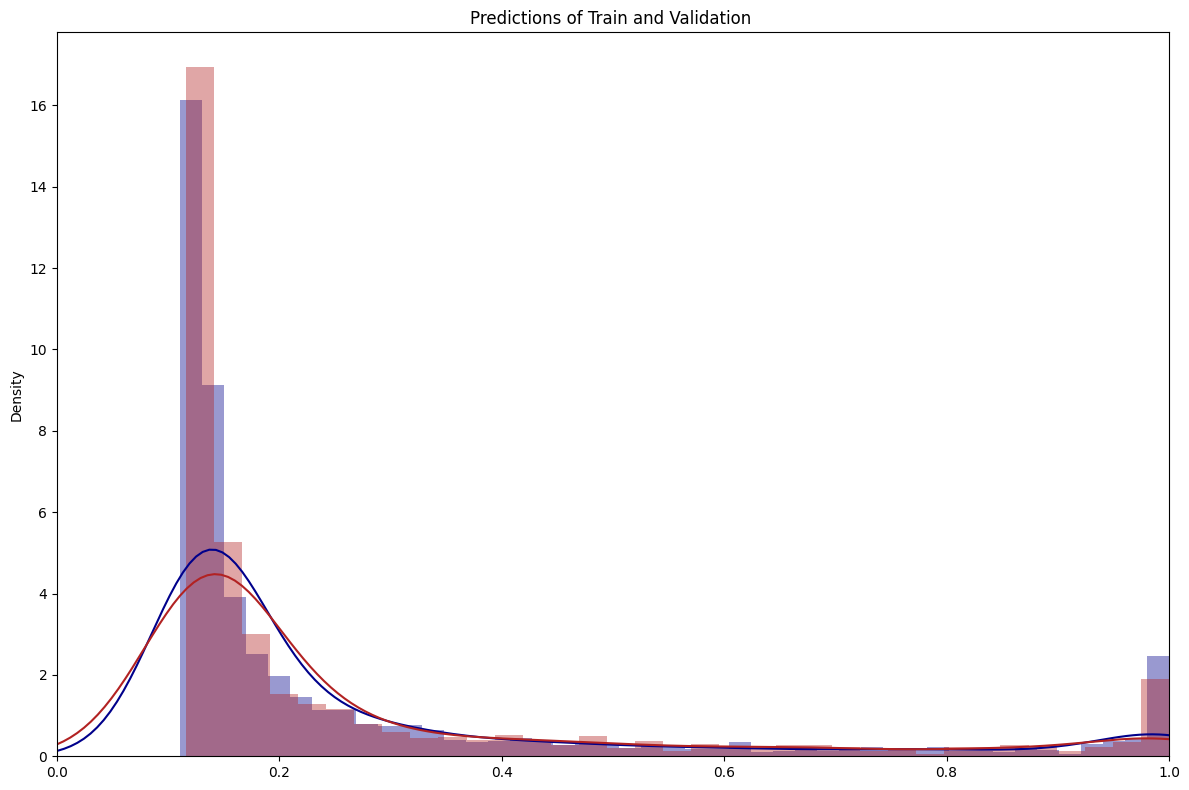

In [75]:


#--- INSPECT Lets compare model prediction performance on train and Validation both.
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12,8))

sns.distplot(lr_model.predict_proba(X_train)[:,1],color='darkblue')
sns.distplot(lr_model.predict_proba(X_val)[:,1],color='firebrick')
plt.title('Predictions of Train and Validation ')
plt.xlim([0, 1])

plt.tight_layout()
plt.show()

In [76]:
#--- persist plot
def persistPltImage(pltObj, strPngName):
  #pltObj.show()
  pltObj.savefig(strPngName)

strFile = pth_binModels + "lgr_trainVal_probPred_colab.png"
print(strFile)
persistPltImage(plt, strFile)

/home/kidcoconut/myLurnins/fourthbrain.ai/code/rpo_mle10_capstone/model-baseline/lgr_trainVal_probPred_colab.png


<Figure size 640x480 with 0 Axes>

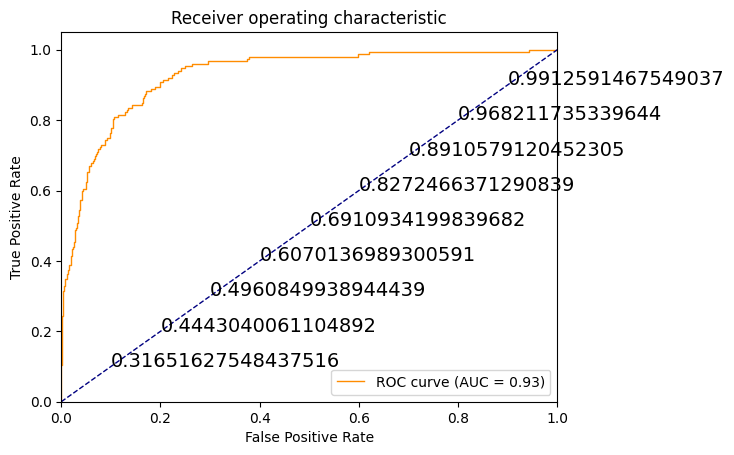

In [77]:

#--- INSPECT:  let's take a look at the ROC curve;  receiver Operating Chars
from sklearn.metrics import roc_curve, auc, precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_val, lr_model.predict_proba(X_val)[:,1])         
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

for label in range(1,10,1):
    plt.text((10-label)/10,(10-label)/10,thresholds[label*15],fontdict={'size': 14})

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Precision Vs Recall')

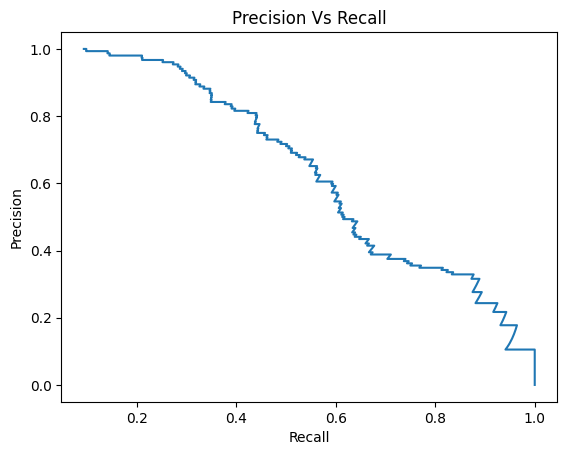

In [78]:


#--- Lets Check precision and recall 
precision, recall, _ = precision_recall_curve(y_val, lr_model.predict_proba(X_val)[:,1])

plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Vs Recall')

In [79]:
lr_train_pred_60=(lr_model.predict_proba(X_train)[:,1]>0.60).astype(bool)
lr_val_pred_60=(lr_model.predict_proba(X_val)[:,1]>0.60).astype(bool)   # set threshold as 0.60

In [80]:
#--- Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,auc


#--- training data
cm0 = confusion_matrix(y_train, lr_train_pred_60,labels=[1,0])
print('Confusion Matrix Train : \n', cm0)

#--- validation data
cm1 = confusion_matrix(y_val, lr_val_pred_60,labels=[1,0])
print('\nConfusion Matrix Val: \n', cm1)

total0=sum(sum(cm0))
total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy0=(cm0[0,0]+cm0[1,1])/total0
print ('\nAccuracy Train: ', accuracy0)

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Val: ', accuracy1)

sensitivity0 = cm0[0,0]/(cm0[0,0]+cm0[0,1])
print('Sensitivity Train : ', sensitivity0 )

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity Val: ', sensitivity1 )


specificity0 = cm0[1,1]/(cm0[1,0]+cm0[1,1])
print('Specificity Train: ', specificity0)

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity Val: ', specificity1)

KappaValue=cohen_kappa_score(y_val, lr_val_pred_60)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_val, lr_val_pred_60)

print("AUC         :",AUC)

print("F1-Score Train  : ",f1_score(y_train, lr_train_pred_60))

print("F1-Score Val  : ",f1_score(y_val, lr_val_pred_60))

Confusion Matrix Train : 
 [[ 258   96]
 [ 216 3217]]

Confusion Matrix Val: 
 [[ 106   46]
 [ 101 1370]]

Accuracy Train:  0.917612886189596
Accuracy Val:  0.9094269870609981
Sensitivity Train :  0.7288135593220338
Sensitivity Val:  0.6973684210526315
Specificity Train:  0.9370812700262161
Specificity Val:  0.9313392250169953
Kappa Value : 0.5409511495413956
AUC         : 0.8143538230348133
F1-Score Train  :  0.6231884057971013
F1-Score Val  :  0.5905292479108636


In [81]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score as accuracy,
    recall_score as recall,
    precision_score as precision,
    f1_score
)

def display_metrics(y_true, y_pred):
    print(f"Confusion Matrix: \n{confusion_matrix(y_true, y_pred)}")
    print(f"\nF1 Score:\t {f1_score(y_true, y_pred):.3f}")
    print(f"Accuracy:\t {accuracy(y_true, y_pred):.3f}")
    print(f"Recall:\t\t {recall(y_true, y_pred):.3f}")
    print(f"Precision:\t {precision(y_true, y_pred):.3f}")

In [82]:
#--- LogR perf metrics:  Train
display_metrics(y_train, lr_train_pred_60)


Confusion Matrix: 
[[3217  216]
 [  96  258]]

F1 Score:	 0.623
Accuracy:	 0.918
Recall:		 0.729
Precision:	 0.544


In [83]:
#--- LogR perf metrics:  Validation
display_metrics(y_val, lr_val_pred_60)

Confusion Matrix: 
[[1370  101]
 [  46  106]]

F1 Score:	 0.591
Accuracy:	 0.909
Recall:		 0.697
Precision:	 0.512


## Model II: Support Vector Machines

In [84]:
%%time
from sklearn.svm import LinearSVC

svm_model = LinearSVC(random_state=0, tol=1e-5) 
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_val)

CPU times: user 495 ms, sys: 5.73 ms, total: 500 ms
Wall time: 495 ms


/home/kidcoconut/miniconda3/envs/nbk_capst_py38_sk111/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [85]:
display_metrics(y_val, svm_pred)

Confusion Matrix: 
[[1454   17]
 [  97   55]]

F1 Score:	 0.491
Accuracy:	 0.930
Recall:		 0.362
Precision:	 0.764


In [86]:
persistSVM_model(svm_model)                              #--- X_train is 32 cols;  F1-score = 0.49

## Model III: Gradient Boosting Classifier

In [87]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

gbt_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42) # YOUR CODE HERE
gbt_model.fit(X_train, y_train)
gbt_pred = gbt_model.predict(X_val)

CPU times: user 722 ms, sys: 0 ns, total: 722 ms
Wall time: 827 ms


In [88]:
display_metrics(y_val, gbt_pred)

Confusion Matrix: 
[[1401   70]
 [  60   92]]

F1 Score:	 0.586
Accuracy:	 0.920
Recall:		 0.605
Precision:	 0.568


In [89]:
persistGBC_model(gbt_model)                          #--- X_train is 32 cols;  F1-score = 0.58;  accuracy=0.92

## Auto - ML:   XGBoost Classifier

In [91]:
%pip install tpot

Note: you may need to restart the kernel to use updated packages.


In [92]:
%%time
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=10, 
                      population_size=16,
                      scoring='f1',
                      verbosity=2,
                      random_state=42)
tpot.fit(X_train, y_train)
print(f"Tpot score on test data: {tpot.score(X_val, y_val):.2f}")
tpot.export('tpot_healthcare_anomalies.py')

/home/kidcoconut/.local/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/176 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6268990882068596

Generation 2 - Current best internal CV score: 0.6268990882068596

Generation 3 - Current best internal CV score: 0.6268990882068596

Generation 4 - Current best internal CV score: 0.6286642187990259

Generation 5 - Current best internal CV score: 0.6298232384480262

Generation 6 - Current best internal CV score: 0.6334017749407789

Generation 7 - Current best internal CV score: 0.6381818684448637

Generation 8 - Current best internal CV score: 0.6400313443354053

Generation 9 - Current best internal CV score: 0.6400313443354053

Generation 10 - Current best internal CV score: 0.6405688635409998

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.001, max_depth=2, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.15000000000000002, verbosity=0)
Tpop score on test data: 0.56
CPU times: user 22min 31s, sys: 3min 23s, total: 25min 55s
Wall time: 19min 38s


/home/kidcoconut/miniconda3/envs/nbk_capst_py38_sk111/lib/python3.8/site-packages/sklearn/metrics/_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


# SHAP Explanability:  XG Boost

In [93]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [118]:
#---  

import shap
X_train_summary = shap.sample(X_train, 100, random_state=42)

explainer = shap.KernelExplainer(gbt_model.predict, X_train_summary) 


In [119]:
gbm_shap = explainer.shap_values(X_train_summary)

  0%|          | 0/100 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

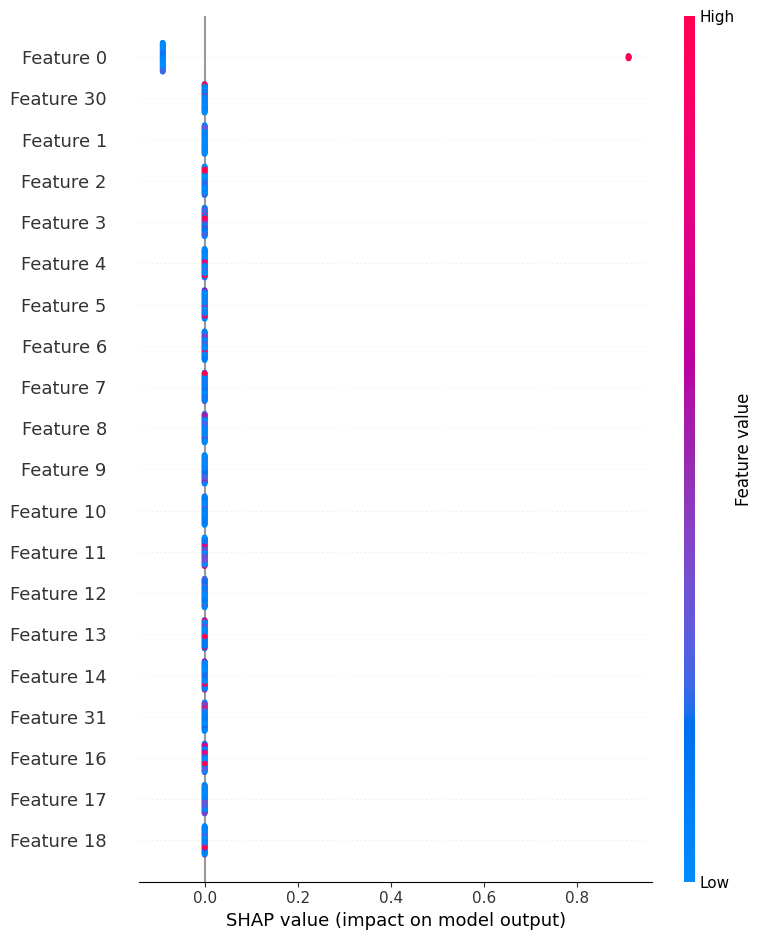

In [120]:

#--- generate summary plot
#--- using gbm shap values, and the feature list from X_train_summary
shap.summary_plot(gbm_shap, X_train_summary)

In [130]:
#--- X_train came from X through the train/validation split

X.columns

Index(['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'AdmittedDays',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'DeadOrNot',
       'Gender_2', 'Race_2', 'Race_3', 'Race_5',
       'InscClaimReimbursement_ProviderAvg', 'DeductibleAmtPaid_ProviderAvg',
       'IPAnnualReimbursementAmt_ProviderAvg',
       'IPAnnualDeductibleAmt_ProviderAvg',
       'OPAnnualReimbursementAmt_ProviderAvg',
       'OPAnnualDeductibleAmt_ProviderAvg'],
      dtype='object')

# INFER:  Feature0 is InscClaimAmtReimbursed.
# INFER:  InscClaimAmtReimbursd has the most influence on the model output

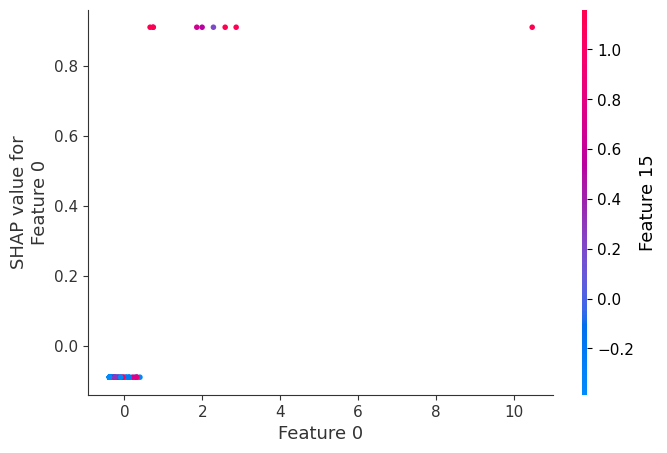

In [122]:
#--- dependence plot
shap.dependence_plot("Feature 0", gbm_shap, X_train_summary)

In [126]:
shap.initjs()

In [127]:

#--- individual force plot;  for a specific observation
klng_obs = 42
shap.force_plot(explainer.expected_value, \
                gbm_shap[klng_obs,:], \
                    X_train_summary[klng_obs,:]) 

In [131]:

#--- collective force plot
shap.force_plot(explainer.expected_value, \
                gbm_shap, X_train_summary)

# Summary

This notebook explores the ability for supervised machine learning techniques to predict anomalies attributed to a Healthcare Provider, based on underlying Claims data.  

&nbsp;

A number of supervised ML techniques, including Logistic Regression,  Support Vector Machines,  XGradient Boost Classifiers were compared for relative performance.  In addition,
Auto-ML was applied through TPot, with the recommended model being XGBoost Classifiers.